In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

2025-04-15 10:49:20.213573: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-15 10:49:20.214148: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 10:49:20.216817: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 10:49:20.224847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-15 10:49:20.238736: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# Data preprocessing 

# Load the dataset
# Dataset details: 
# training size - 60,000
# test size - 10,000 
# 28x28 grayscale images 
# 10 labels for descriptions of like shirt or something 
# Returns:
# Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).
# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
# y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.
# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.
# y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0 

# Split for validation stuff
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.1)



In [3]:
print(validation_images.shape)
print(train_images.shape)

(6000, 28, 28)
(54000, 28, 28)


In [4]:
# Build a CNN 
# My initial model is just a basic CNN that consists of a convolutional layer, a pooling layer, and two fully connected layers.
# The convolutional layer uses the standard 32 filters with a kernel size of 3x3 and ReLU activation function.
# The pooling layer uses the standard 2x2 max pooling operation to reduce the spatial dimensions of the feature maps.
# The first fully connected layer has 64 neurons with ReLU activation, and the output layer has 10 neurons with softmax activation for multi-class classification.
# The other fully connected layer is the output layer with 10 neurons and softmax activation function for multi-class classification.
cnn_model = models.Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
cnn_model.add(MaxPooling2D((2, 2))) 
cnn_model.add(Flatten()) 
cnn_model.add(Dense(64, activation='relu')) 
cnn_model.add(Dense(10, activation='softmax')) 

# Compile the model
# The model is compiled with the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy metric.
cnn_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


/home/juliette/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7785 - loss: 0.6399 - val_accuracy: 0.8760 - val_loss: 0.3465
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8871 - loss: 0.3169 - val_accuracy: 0.9018 - val_loss: 0.2880
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9063 - loss: 0.2609 - val_accuracy: 0.9070 - val_loss: 0.2687
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9137 - loss: 0.2387 - val_accuracy: 0.9092 - val_loss: 0.2582
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9209 - loss: 0.2121 - val_accuracy: 0.9187 - val_loss: 0.2425
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9297 - loss: 0.1930 - val_accuracy: 0.9098 - val_loss: 0.2533
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9378 - loss: 0.1697 - val_accuracy: 0.9180 - val_loss: 0.2364
Epoch 8/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9468 - loss: 0.1479 - val_accu

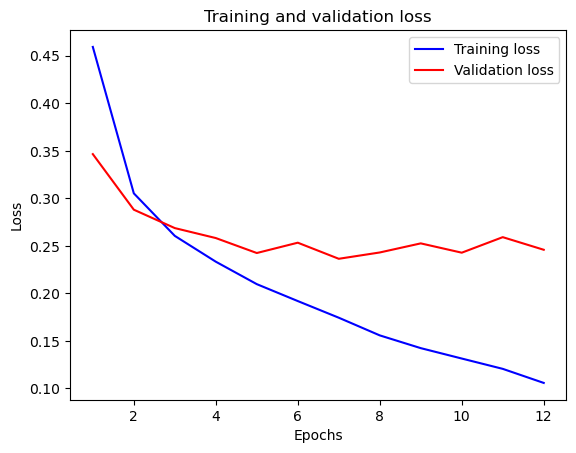

In [5]:
# Train and evaluate

# Early stopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = cnn_model.fit(train_images, train_labels, epochs=100, batch_size=64,
                        validation_data=(validation_images, validation_labels),
                        callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")



# Plot the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


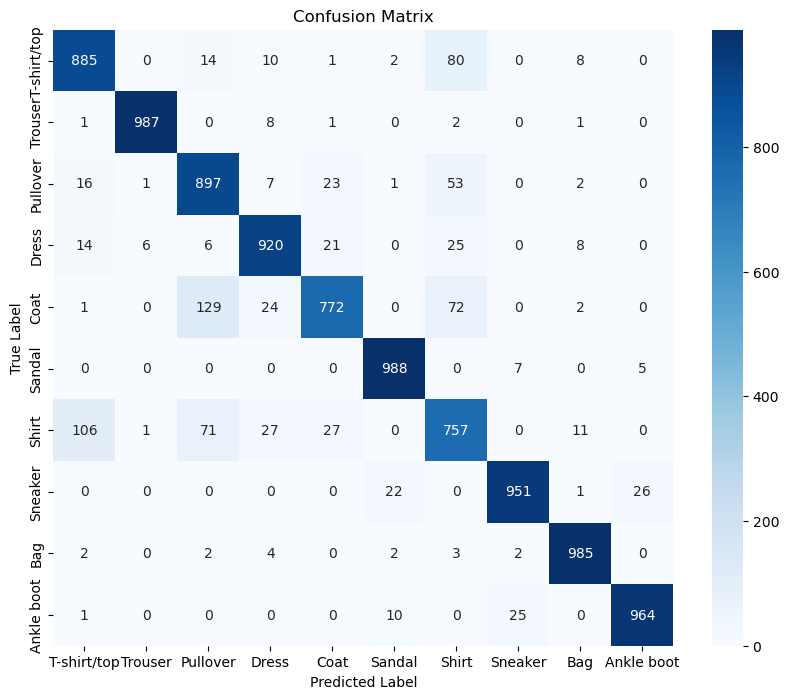

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.89      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.80      0.90      0.85      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.91      0.77      0.84      1000
      Sandal       0.96      0.99      0.98      1000
       Shirt       0.76      0.76      0.76      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [6]:
# Confusion matrix

# Get the predictions and labels to make the confusion matrix
predictions = cnn_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix will include all 10 classes confusion matrices
cm = confusion_matrix(test_labels, predicted_labels)

# Plot it 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[
                'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
            ],
            yticklabels=[
                'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
            ])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification report
report = classification_report(test_labels, predicted_labels, 
                                 target_names=[
                                     'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                                     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
                                 ])
print(report)

/home/juliette/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7318 - loss: 0.7523 - val_accuracy: 0.8682 - val_loss: 0.3716
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8680 - loss: 0.3639 - val_accuracy: 0.8865 - val_loss: 0.3104
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8829 - loss: 0.3112 - val_accuracy: 0.8998 - val_loss: 0.2793
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8957 - loss: 0.2753 - val_accuracy: 0.8967 - val_loss: 0.2716
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9052 - loss: 0.2510 - val_accuracy: 0.9095 - val_loss: 0.2576
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8560 - loss: 0.4137
Test accuracy: 0.8536


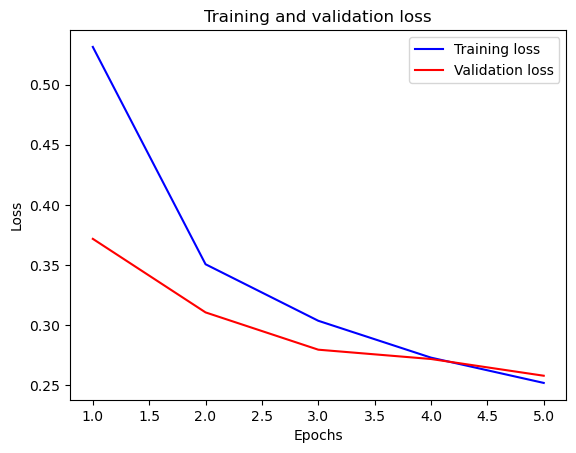

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


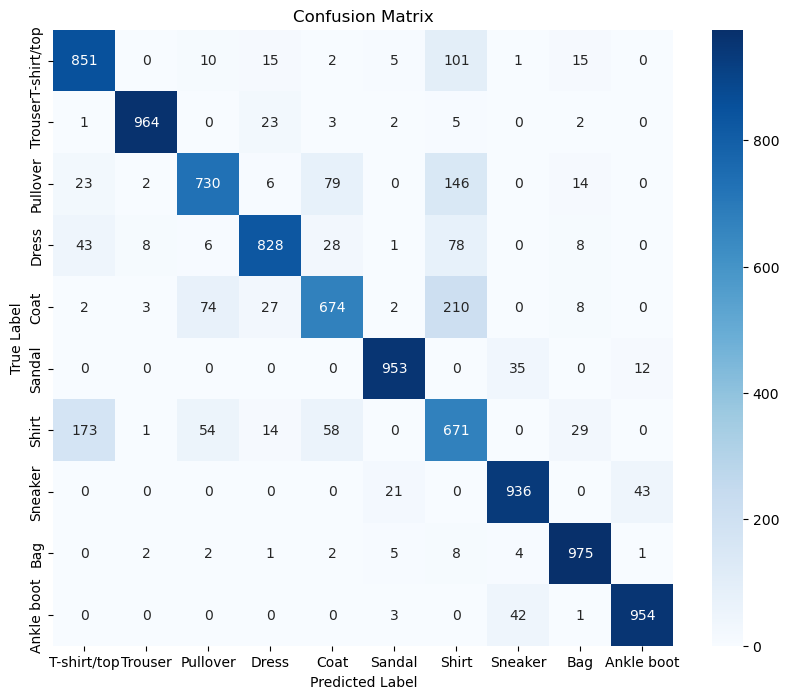

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.85      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.83      0.73      0.78      1000
       Dress       0.91      0.83      0.87      1000
        Coat       0.80      0.67      0.73      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.55      0.67      0.60      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.93      0.97      0.95      1000
  Ankle boot       0.94      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [10]:
# Experimentation and improvement

# Modification 1: Adding more layers 
# I build upon my initial model by adding an additional convolutional and pooling layer. 
# I chose this to see if the model could better learn more complex features and overall improve
# I also added a another dense layer with more neurons to increase the model's capacity to learn. 

# The rest is all the same I did before 

# Build a CNN 
cnn_model2 = models.Sequential()
cnn_model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
cnn_model2.add(MaxPooling2D((2, 2))) 
cnn_model2.add(Conv2D(32, (3, 3), activation='relu')) 
cnn_model2.add(MaxPooling2D((2, 2))) 
cnn_model2.add(Flatten()) 
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(64, activation='relu'))
cnn_model2.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model2.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history2 = cnn_model2.fit(train_images, train_labels, epochs=100, batch_size=64,
                        validation_data=(validation_images, validation_labels),
                        callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = cnn_model2.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot the training and validation loss
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion matrix
predictions2 = cnn_model2.predict(test_images)
predicted_labels2 = np.argmax(predictions2, axis=1)

cm2 = confusion_matrix(test_labels, predicted_labels2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[
                'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
            ],
            yticklabels=[
                'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
            ])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification report
report2 = classification_report(test_labels, predicted_labels2, 
                                 target_names=[
                                     'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                                     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
                                 ])
print(report2)

/home/juliette/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6858 - loss: 0.8857 - val_accuracy: 0.8527 - val_loss: 0.3900
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8470 - loss: 0.4230 - val_accuracy: 0.8865 - val_loss: 0.3101
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8710 - loss: 0.3574 - val_accuracy: 0.8900 - val_loss: 0.2965
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8792 - loss: 0.3295 - val_accuracy: 0.9007 - val_loss: 0.2738
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8878 - loss: 0.3015 - val_accuracy: 0.9080 - val_loss: 0.2552
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.4227
Test accuracy: 0.8430


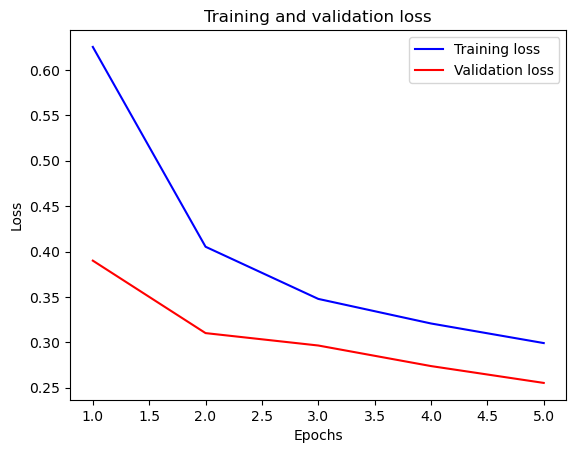

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


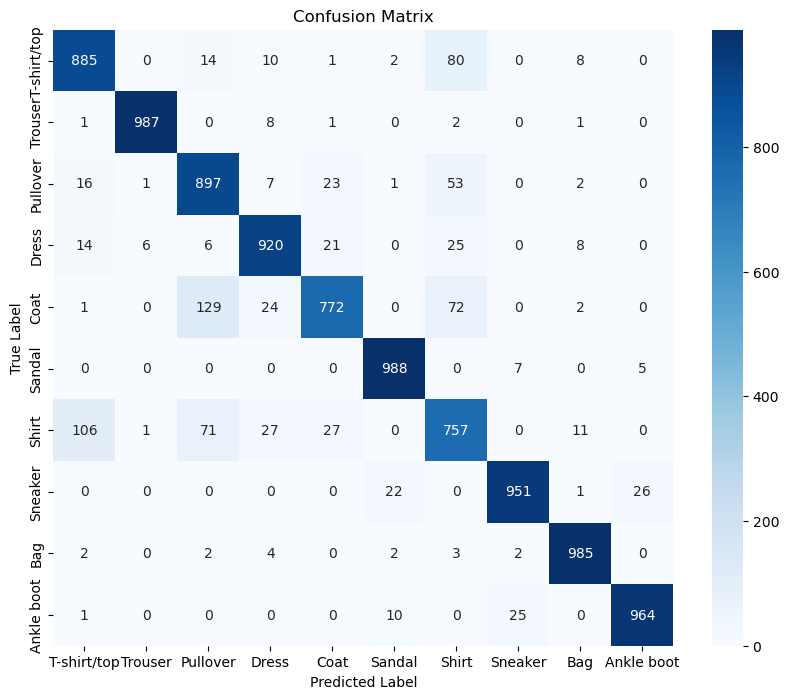

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.89      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.80      0.90      0.85      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.91      0.77      0.84      1000
      Sandal       0.96      0.99      0.98      1000
       Shirt       0.76      0.76      0.76      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [12]:
# Experimentation and improvement
# Modification 2: Add dropout layers 
# I build upon my initial model by adding dropout layers after the convolutional and fully connected layers.
# I chose this to see if the model could learn more robust features while reducing any overfitting issues.

# The rest is all the same I did before 

# Build a CNN 
cnn_model3 = models.Sequential()
cnn_model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
cnn_model3.add(MaxPooling2D((2, 2))) 
cnn_model3.add(Conv2D(32, (3, 3), activation='relu')) 
cnn_model3.add(MaxPooling2D((2, 2))) 
cnn_model3.add(Dropout(0.25)) 
cnn_model3.add(Flatten()) 
cnn_model3.add(Dense(128, activation='relu')) 
cnn_model3.add(Dense(64, activation='relu')) 
cnn_model3.add(Dropout(0.25)) 
cnn_model3.add(Dense(10, activation='softmax')) 

# Compile the model
cnn_model3.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history3 = cnn_model3.fit(train_images, train_labels, epochs=100, batch_size=64,
                        validation_data=(validation_images, validation_labels),
                        callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = cnn_model3.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot the training and validation loss
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion matrix
predictions3 = cnn_model.predict(test_images)
predicted_labels3 = np.argmax(predictions3, axis=1)

cm3 = confusion_matrix(test_labels, predicted_labels3)

plt.figure(figsize=(10, 8))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[
                'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
            ],
            yticklabels=[
                'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
            ])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification report
report3 = classification_report(test_labels, predicted_labels3, 
                                 target_names=[
                                     'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                                     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
                                 ])
print(report3)